This notebook loads pandas dataframes pickled in a previous notebook and describes the construction of the timeseries plots.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from datetime import datetime
import pickle
from matplotlib import rcParams
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from seaborn import boxplot, scatterplot
import pymc3 as pm
from IPython.core.display import HTML, display

In [2]:
%matplotlib inline

# Global graphics setup
display(HTML("<style>.container {width: 90%}</style>"))
plot_colors = {'swf': '#000000',
               'aqua': '#348ABD',
               'aqua2': '#8000FF',
               'viirs': '#A60628',
               'mei': '#467821',
               }
rcParams['axes.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['font.size'] = 15
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.size'] = 3
rcParams['xtick.major.size'] = 8
rcParams['xtick.minor.size'] = 3
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.direction'] = 'in'
rcParams['text.usetex'] = False
rcParams['font.family'] = 'serif'
rcParams['axes.formatter.limits'] = (-2, 3)

In [72]:
def val_to_perc(val, mean):
    return (val - mean) / mean * 100


def val_anom_to_perc(val, mean):
    return val / mean * 100
    

def set_time_axis(ax):
    x_minorlocator = mdates.YearLocator()
    x_majorformatter = mdates.DateFormatter('%b\n%Y')
    x_majorlocator = mdates.YearLocator(2)
    ax.xaxis.set_minor_locator(x_minorlocator)
    ax.xaxis.set_tick_params(rotation=0)
    ax.xaxis.set_major_formatter(x_majorformatter)
    ax.xaxis.set_major_locator(x_majorlocator)
    ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center')
    ax.set_xlabel('')


def make_ax_1(ax_c, df_, ylims=None, ls='-', **kwargs):
    
    lbl = kwargs.pop('lbl', 'phyto_C_mean')
    use95ci = kwargs.pop('use95ci', False)
    use50ci = kwargs.pop('use50ci', False)
    mean_val = kwargs.pop('mean_val', df_[lbl].mean())
    ylabel = kwargs.pop('ylabel', lbl)
    ylabel2 = kwargs.pop('ylabel2', lbl)
    use_sensor = kwargs.pop('use_sensor', True)
    
    df_.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color='k',
                legend=False)
    if use_sensor:
        df_.loc[df_.sensor=='swf', :].plot(y=lbl, marker='+', linestyle=ls,
                                          ax=ax_c, color='blue',
                                          legend=False)
        df_.loc[df_.sensor=='both', :].plot(y=lbl, marker='+', linestyle=ls,
                                         ax=ax_c, color='k', legend=False)
        df_.loc[df_.sensor=='aqua', :].plot(y=lbl, marker='+', linestyle=ls,
                                           ax=ax_c, color='red',
                                           legend=False)
    
    ax_c.set_ylabel(ylabel)
    if ylims:
        ax_c.set_ylim(ylims)
    else:
        ylims = ax_c.get_ylim()
    if use95ci:
        cols95ci = df_.filter(regex=use95ci, axis=1).columns.tolist()
        ax_c.fill_between(df_.index, df_[cols95ci[1]], df_[cols95ci[0]],
                          color='k', alpha=0.5)
    if use50ci:
        cols50ci = df_.filter(regex=use50ci, axis=1).columns.tolist()
        ax_c.fill_between(df_.index, df_[cols50ci[1]], df_[cols50ci[0]],
                          color='k', alpha=0.7)
        
    ax_c.axhline(mean_val, color='k')
    ax_p = ax_c.twinx()
    ax_p.set_ylabel(ylabel2)
    ax_p.set_ylim(val_to_perc(ylims[0], mean=mean_val),
              val_to_perc(ylims[1], mean=mean_val)
             )
    ax_c.grid(axis='x', which='both', linestyle='--', linewidth=2)
    set_time_axis(ax_c)

    
def make_ax_2(ax, df_, ls='-', ylims=None, lbl='phyto_C_anomaly', **kwargs):
    use_sensor = kwargs.pop('use_sensor', True)
    
    df_.plot(y=lbl, marker='+', linestyle=ls, ax=ax, color='k',
                legend=False)
    if use_sensor:
        df_.loc[df_.sensor=='swf', :].plot(y=lbl, marker='+', linestyle=ls,
                                          ax=ax, color='blue',
                                          legend=False)
        df_.loc[df_.sensor=='both', :].plot(y=lbl, marker='+', linestyle=ls,
                                         ax=ax, color='k', legend=False)
        df_.loc[df_.sensor=='aqua', :].plot(y=lbl, marker='+', linestyle=ls,
                                           ax=ax, color='red',
                                           legend=False)
    #if use_mei:
    #    df_mei.plot(y='MEI', marker='D', ax=ax,
    #                color=plot_colors['mei'], linestyle='', legend=False)
    mean_val = kwargs.pop('mean_val', df_[lbl].mean())
    ylabel = kwargs.pop('ylabel', lbl)
    ylabel2 = kwargs.pop('ylabel2', lbl + 'anomaly (\%)')
    ax.axhline(linestyle='-', linewidth=1.5, color='k')
    ax.grid(axis='x', which='both', linestyle='--', linewidth=2)
    ax.set_ylabel(ylabel) 
    if ylims:
        ax.set_ylim(ylims)
    else:
        ylims = ax.get_ylim()
    if mean_val:
        ax2 = ax.twinx()
        ax2.set_ylabel(ylabel2)
        ax2.set_ylim(val_anom_to_perc(ylims[0], mean=mean_val),
                     val_anom_to_perc(ylims[1], mean=mean_val))
    set_time_axis(ax)
    ax.set_xlabel('')

In [4]:
# Load the previously pickled dataframes 
df_both = pd.read_pickle('./pklJar/df_consolidated_2019-02-28 11:07:00.990540.pkl')
df_mei = pd.read_pickle('../PklJar/dfMEI.pkl')

In [5]:
df_both.head()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor
datetime,,,,,,,,,,
1997-11-15,0.126552,0.002073,22.757247,24.142836,24.841083,25.530049,26.981910,-0.008520,0.087324,swf
1997-12-15,0.126516,0.001988,21.980533,23.123099,23.845324,24.430774,25.972896,-0.009597,-0.293074,swf
1998-01-15,0.126163,0.001946,21.502099,22.655481,23.347797,23.930489,25.382582,-0.013876,-0.073082,swf
1998-02-15,0.125127,0.001933,21.347144,22.505127,23.187600,23.768797,25.193990,-0.020037,-0.004399,swf
1998-03-15,0.126646,0.001961,21.685105,22.817465,23.517991,24.100255,25.604928,-0.017906,0.276416,swf


In [6]:
df_both.tail()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor
datetime,,,,,,,,,,
2018-08-15,0.145831,0.001962,21.699946,22.833810,23.534577,24.118367,25.624667,-0.002679,0.182068,aqua
2018-09-15,0.146374,0.001998,22.065556,23.228285,23.961768,24.545511,26.085756,-0.004483,0.112339,aqua
2018-10-15,0.136225,0.002099,23.030007,24.314325,25.148188,25.727042,27.321778,-0.004725,0.611075,aqua
2018-11-15,0.128821,0.002088,22.907693,24.189000,25.009986,25.589265,27.168832,-0.006252,0.256226,aqua
2018-12-15,0.137366,0.001995,22.029605,23.196129,23.924953,24.510049,26.039054,0.001253,-0.213445,aqua


In [7]:
df_both.describe()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,0.142111,0.001976,21.808652,22.995031,23.703082,24.297652,25.772109,-0.001122,0.007712
std,0.007532,0.000057,0.572911,0.641507,0.669017,0.688303,0.722521,0.006026,0.408154
min,0.125127,0.001827,20.236927,21.245203,21.943431,22.443227,23.842729,-0.020037,-1.108569
25%,0.136999,0.001938,21.408284,22.564212,23.251763,23.832736,25.268121,-0.005153,-0.243265
50%,0.141843,0.001970,21.710074,22.914984,23.622731,24.205675,25.650114,-0.001427,0.027300
75%,0.147354,0.002014,22.235508,23.392813,24.145752,24.726081,26.295156,0.002939,0.283041
max,0.164053,0.002141,23.482539,24.795544,25.636423,26.249198,27.897621,0.016641,1.368564


In [8]:
df_mei = df_mei.resample('MS', loffset=pd.Timedelta(14, 'd')).first()

In [9]:
df_mei.describe()

,MEI
count,262.000000
mean,0.222046
std,0.976229
min,-1.885500
25%,-0.467375
50%,0.132750
75%,0.764000
max,2.996000


In [10]:
df_all = pd.merge(df_both, df_mei, left_index=True, right_index=True)

In [11]:
df_all.loc[(df_all.MEI.isna())|(df_all.chl_adj_mean.isna())|(df_all.chl_anomaly.isna())|
           (df_all.phyto_C_mean.isna())|(df_all.phyto_C_anomaly.isna())]

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI
datetime,,,,,,,,,,,
2018-11-15,0.128821,0.002088,22.907693,24.189000,25.009986,25.589265,27.168832,-0.006252,0.256226,aqua,NaN
2018-12-15,0.137366,0.001995,22.029605,23.196129,23.924953,24.510049,26.039054,0.001253,-0.213445,aqua,NaN


In [12]:
df_all.head()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI
datetime,,,,,,,,,,,
1997-11-15,0.126552,0.002073,22.757247,24.142836,24.841083,25.530049,26.981910,-0.008520,0.087324,swf,2.4300
1997-12-15,0.126516,0.001988,21.980533,23.123099,23.845324,24.430774,25.972896,-0.009597,-0.293074,swf,2.3995
1998-01-15,0.126163,0.001946,21.502099,22.655481,23.347797,23.930489,25.382582,-0.013876,-0.073082,swf,2.6160
1998-02-15,0.125127,0.001933,21.347144,22.505127,23.187600,23.768797,25.193990,-0.020037,-0.004399,swf,2.7640
1998-03-15,0.126646,0.001961,21.685105,22.817465,23.517991,24.100255,25.604928,-0.017906,0.276416,swf,2.7045


In [13]:
df_all.tail()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI
datetime,,,,,,,,,,,
2018-08-15,0.145831,0.001962,21.699946,22.833810,23.534577,24.118367,25.624667,-0.002679,0.182068,aqua,0.3205
2018-09-15,0.146374,0.001998,22.065556,23.228285,23.961768,24.545511,26.085756,-0.004483,0.112339,aqua,0.4885
2018-10-15,0.136225,0.002099,23.030007,24.314325,25.148188,25.727042,27.321778,-0.004725,0.611075,aqua,0.5830
2018-11-15,0.128821,0.002088,22.907693,24.189000,25.009986,25.589265,27.168832,-0.006252,0.256226,aqua,NaN
2018-12-15,0.137366,0.001995,22.029605,23.196129,23.924953,24.510049,26.039054,0.001253,-0.213445,aqua,NaN


In [14]:
df_all['inv_scaled'] = (df_all.MEI*-1)/120 + 0.003
df_all['inv_scaled2'] =(df_all.MEI*-1) / 2 +.5

In [15]:
%matplotlib inline

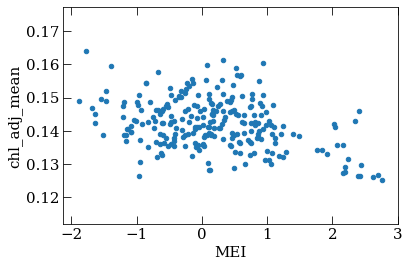

In [16]:
df_all.plot.scatter('MEI', 'chl_adj_mean');

In [17]:
df_all['MEI_s'] = (df_all.MEI - df_all.MEI.mean()) / df_all.MEI.std()

In [18]:
df_all.head()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI,inv_scaled,inv_scaled2,MEI_s
datetime,,,,,,,,,,,,,,
1997-11-15,0.126552,0.002073,22.757247,24.142836,24.841083,25.530049,26.981910,-0.008520,0.087324,swf,2.4300,-0.017250,-0.71500,2.451941
1997-12-15,0.126516,0.001988,21.980533,23.123099,23.845324,24.430774,25.972896,-0.009597,-0.293074,swf,2.3995,-0.016996,-0.69975,2.418848
1998-01-15,0.126163,0.001946,21.502099,22.655481,23.347797,23.930489,25.382582,-0.013876,-0.073082,swf,2.6160,-0.018800,-0.80800,2.653759
1998-02-15,0.125127,0.001933,21.347144,22.505127,23.187600,23.768797,25.193990,-0.020037,-0.004399,swf,2.7640,-0.020033,-0.88200,2.814345
1998-03-15,0.126646,0.001961,21.685105,22.817465,23.517991,24.100255,25.604928,-0.017906,0.276416,swf,2.7045,-0.019537,-0.85225,2.749785


In [19]:
df_all.tail()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI,inv_scaled,inv_scaled2,MEI_s
datetime,,,,,,,,,,,,,,
2018-08-15,0.145831,0.001962,21.699946,22.833810,23.534577,24.118367,25.624667,-0.002679,0.182068,aqua,0.3205,0.000329,0.33975,0.163045
2018-09-15,0.146374,0.001998,22.065556,23.228285,23.961768,24.545511,26.085756,-0.004483,0.112339,aqua,0.4885,-0.001071,0.25575,0.345332
2018-10-15,0.136225,0.002099,23.030007,24.314325,25.148188,25.727042,27.321778,-0.004725,0.611075,aqua,0.5830,-0.001858,0.20850,0.447868
2018-11-15,0.128821,0.002088,22.907693,24.189000,25.009986,25.589265,27.168832,-0.006252,0.256226,aqua,NaN,NaN,NaN,NaN
2018-12-15,0.137366,0.001995,22.029605,23.196129,23.924953,24.510049,26.039054,0.001253,-0.213445,aqua,NaN,NaN,NaN,NaN


In [20]:
df_all_ = df_all.dropna().copy()

In [21]:
df_all_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1997-11-15 to 2018-10-15
Data columns (total 14 columns):
chl_adj_mean       252 non-null float64
bbp_adj_mean       252 non-null float64
phyto_C_95CI_lo    252 non-null float64
phyto_C_50CI_lo    252 non-null float64
phyto_C_mean       252 non-null float64
phyto_C_50CI_hi    252 non-null float64
phyto_C_95CI_hi    252 non-null float64
chl_anomaly        252 non-null float64
phyto_C_anomaly    252 non-null float64
sensor             252 non-null object
MEI                252 non-null float64
inv_scaled         252 non-null float64
inv_scaled2        252 non-null float64
MEI_s              252 non-null float64
dtypes: float64(13), object(1)
memory usage: 29.5+ KB


In [22]:
with pm.Model() as m1:
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 1)
    mu_= alpha + beta * df_all_.MEI.values
    sig_ = pm.HalfCauchy('sig', beta=5)
    likl = pm.Normal('likl', mu=mu_, sd=sig_, observed=df_all_.chl_adj_mean.values)

In [23]:
with m1:
    trace_1 = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4056.52draws/s]


In [24]:
with pm.Model() as m2:
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 1)
    mu_= alpha + beta * df_all_.MEI.values
    sig_ = pm.HalfCauchy('sig', beta=5)
    likl = pm.Normal('likl', mu=mu_, sd=sig_, observed=df_all_.phyto_C_mean)

In [25]:
with m2:
    trace_2 = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 3896.11draws/s]


In [26]:
with pm.Model() as m1_anom:
    
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 1)
    mu_= alpha + beta * df_all_.MEI.values
    sig_ = pm.HalfCauchy('sig', beta=5)
    likl = pm.Normal('likl', mu=mu_, sd=sig_, observed=df_all_.chl_anomaly)

In [27]:
with m1_anom:
    trace_1_anom = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2579.04draws/s]


In [28]:
with pm.Model() as m2_anom:
    alpha = pm.Normal('alpha', 0, 1)
    beta = pm.Normal('beta', 0, 1)
    mu_= alpha + beta * df_all_.MEI.values
    sig_ = pm.HalfCauchy('sig', beta=5)
    likl = pm.Normal('likl', mu=mu_, sd=sig_, observed=df_all_.phyto_C_anomaly)
    trace_2_anom = pm.sample(tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sig, beta, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 4268.13draws/s]


In [29]:
alpha_chl = trace_1.get_values('alpha').mean()
beta_chl = trace_1.get_values('beta').mean()
alpha_C = trace_2.get_values('alpha').mean()
beta_C = trace_2.get_values('beta').mean()
alpha_chl_anom = trace_1_anom.get_values('alpha').mean()
beta_chl_anom = trace_1_anom.get_values('beta').mean()
alpha_C_anom = trace_2_anom.get_values('alpha').mean()
beta_C_anom = trace_2_anom.get_values('beta').mean()

In [30]:
alpha_chl, beta_chl

(0.14268563260871084, -0.002822172642056238)

In [31]:
alpha_C, beta_C

(23.69149872920575, -0.19992029986668883)

In [32]:
df_all_.head()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI,inv_scaled,inv_scaled2,MEI_s
datetime,,,,,,,,,,,,,,
1997-11-15,0.126552,0.002073,22.757247,24.142836,24.841083,25.530049,26.981910,-0.008520,0.087324,swf,2.4300,-0.017250,-0.71500,2.451941
1997-12-15,0.126516,0.001988,21.980533,23.123099,23.845324,24.430774,25.972896,-0.009597,-0.293074,swf,2.3995,-0.016996,-0.69975,2.418848
1998-01-15,0.126163,0.001946,21.502099,22.655481,23.347797,23.930489,25.382582,-0.013876,-0.073082,swf,2.6160,-0.018800,-0.80800,2.653759
1998-02-15,0.125127,0.001933,21.347144,22.505127,23.187600,23.768797,25.193990,-0.020037,-0.004399,swf,2.7640,-0.020033,-0.88200,2.814345
1998-03-15,0.126646,0.001961,21.685105,22.817465,23.517991,24.100255,25.604928,-0.017906,0.276416,swf,2.7045,-0.019537,-0.85225,2.749785


In [33]:
df_all_['chl_scaled'] = df_all_.MEI * beta_chl + alpha_chl
df_all_['C_scaled'] = df_all_.MEI * beta_C + alpha_C
df_all_['chl_anom_scaled'] = df_all_.MEI * beta_chl_anom + alpha_chl_anom
df_all_['C_anom_scaled'] = df_all_.MEI * beta_C_anom + alpha_C_anom

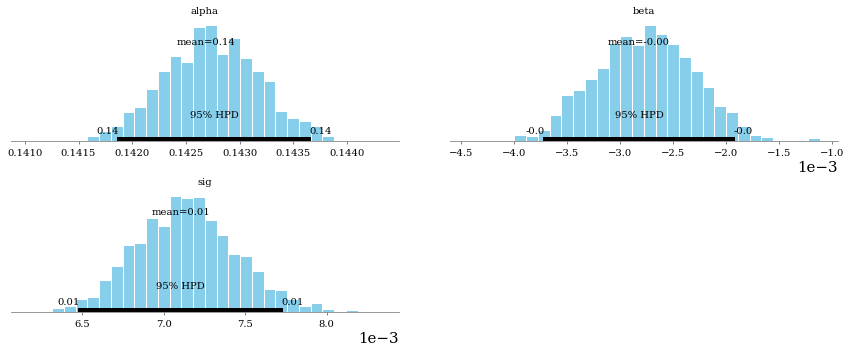

In [34]:
pm.plot_posterior(trace_1, round_to=2);

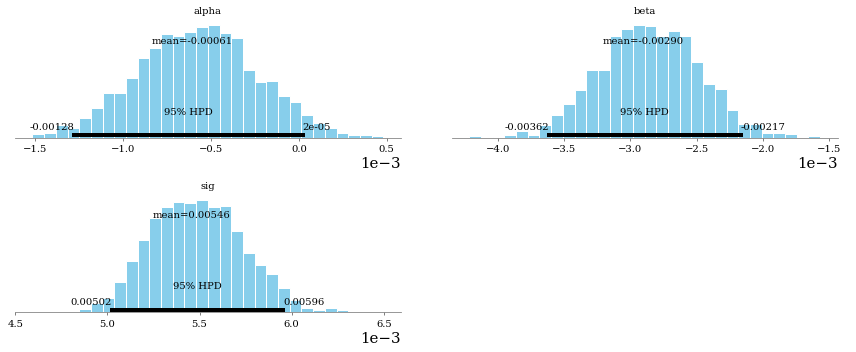

In [35]:
pm.plot_posterior(trace_1_anom, round_to=5);

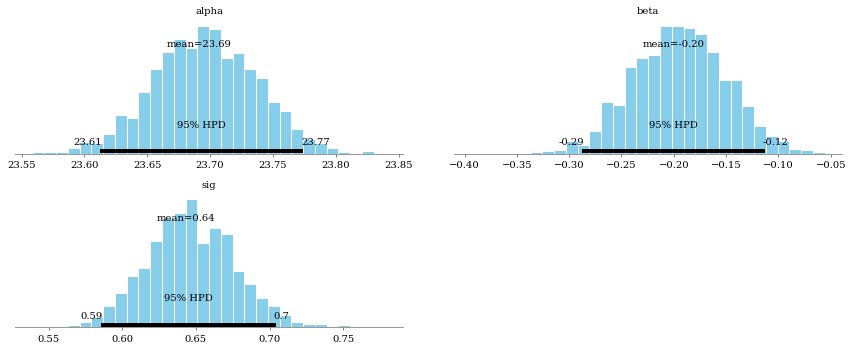

In [36]:
pm.plot_posterior(trace_2, round_to=2);

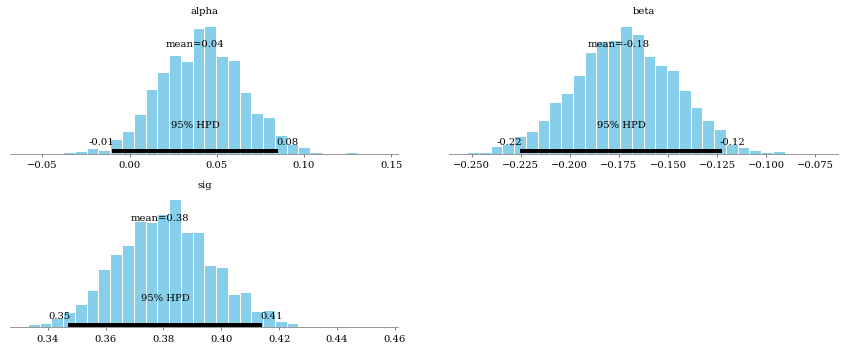

In [37]:
pm.plot_posterior(trace_2_anom, round_to=2);

In [39]:
df_all_.tail()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI,inv_scaled,inv_scaled2,MEI_s,chl_scaled,C_scaled,chl_anom_scaled,C_anom_scaled
datetime,,,,,,,,,,,,,,,,,,
2018-06-15,0.148013,0.001965,21.701147,22.870885,23.573273,24.157782,25.634105,0.003225,0.110418,aqua,0.2725,0.000729,0.36375,0.110963,0.141917,23.637020,-0.001399,-0.010230
2018-07-15,0.151222,0.001936,21.385007,22.537505,23.223240,23.804308,25.241528,0.002951,0.171240,aqua,0.1040,0.002133,0.44800,-0.071867,0.142392,23.670707,-0.000910,0.019299
2018-08-15,0.145831,0.001962,21.699946,22.833810,23.534577,24.118367,25.624667,-0.002679,0.182068,aqua,0.3205,0.000329,0.33975,0.163045,0.141781,23.627424,-0.001538,-0.018641
2018-09-15,0.146374,0.001998,22.065556,23.228285,23.961768,24.545511,26.085756,-0.004483,0.112339,aqua,0.4885,-0.001071,0.25575,0.345332,0.141307,23.593838,-0.002026,-0.048082
2018-10-15,0.136225,0.002099,23.030007,24.314325,25.148188,25.727042,27.321778,-0.004725,0.611075,aqua,0.5830,-0.001858,0.20850,0.447868,0.141040,23.574945,-0.002300,-0.064642


In [41]:
df_all.tail()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI,inv_scaled,inv_scaled2,MEI_s
datetime,,,,,,,,,,,,,,
2018-08-15,0.145831,0.001962,21.699946,22.833810,23.534577,24.118367,25.624667,-0.002679,0.182068,aqua,0.3205,0.000329,0.33975,0.163045
2018-09-15,0.146374,0.001998,22.065556,23.228285,23.961768,24.545511,26.085756,-0.004483,0.112339,aqua,0.4885,-0.001071,0.25575,0.345332
2018-10-15,0.136225,0.002099,23.030007,24.314325,25.148188,25.727042,27.321778,-0.004725,0.611075,aqua,0.5830,-0.001858,0.20850,0.447868
2018-11-15,0.128821,0.002088,22.907693,24.189000,25.009986,25.589265,27.168832,-0.006252,0.256226,aqua,NaN,NaN,NaN,NaN
2018-12-15,0.137366,0.001995,22.029605,23.196129,23.924953,24.510049,26.039054,0.001253,-0.213445,aqua,NaN,NaN,NaN,NaN


In [45]:
df_all_2 = df_all.copy()

In [46]:
df_all_2['chl_anom_scaled']  = df_all_.chl_anom_scaled

In [47]:
df_all_2['C_anom_scaled'] = df_all_.C_anom_scaled

In [48]:
df_all_2.tail()

,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI,inv_scaled,inv_scaled2,MEI_s,chl_anom_scaled,C_anom_scaled
datetime,,,,,,,,,,,,,,,,
2018-08-15,0.145831,0.001962,21.699946,22.833810,23.534577,24.118367,25.624667,-0.002679,0.182068,aqua,0.3205,0.000329,0.33975,0.163045,-0.001538,-0.018641
2018-09-15,0.146374,0.001998,22.065556,23.228285,23.961768,24.545511,26.085756,-0.004483,0.112339,aqua,0.4885,-0.001071,0.25575,0.345332,-0.002026,-0.048082
2018-10-15,0.136225,0.002099,23.030007,24.314325,25.148188,25.727042,27.321778,-0.004725,0.611075,aqua,0.5830,-0.001858,0.20850,0.447868,-0.002300,-0.064642
2018-11-15,0.128821,0.002088,22.907693,24.189000,25.009986,25.589265,27.168832,-0.006252,0.256226,aqua,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-15,0.137366,0.001995,22.029605,23.196129,23.924953,24.510049,26.039054,0.001253,-0.213445,aqua,NaN,NaN,NaN,NaN,NaN,NaN


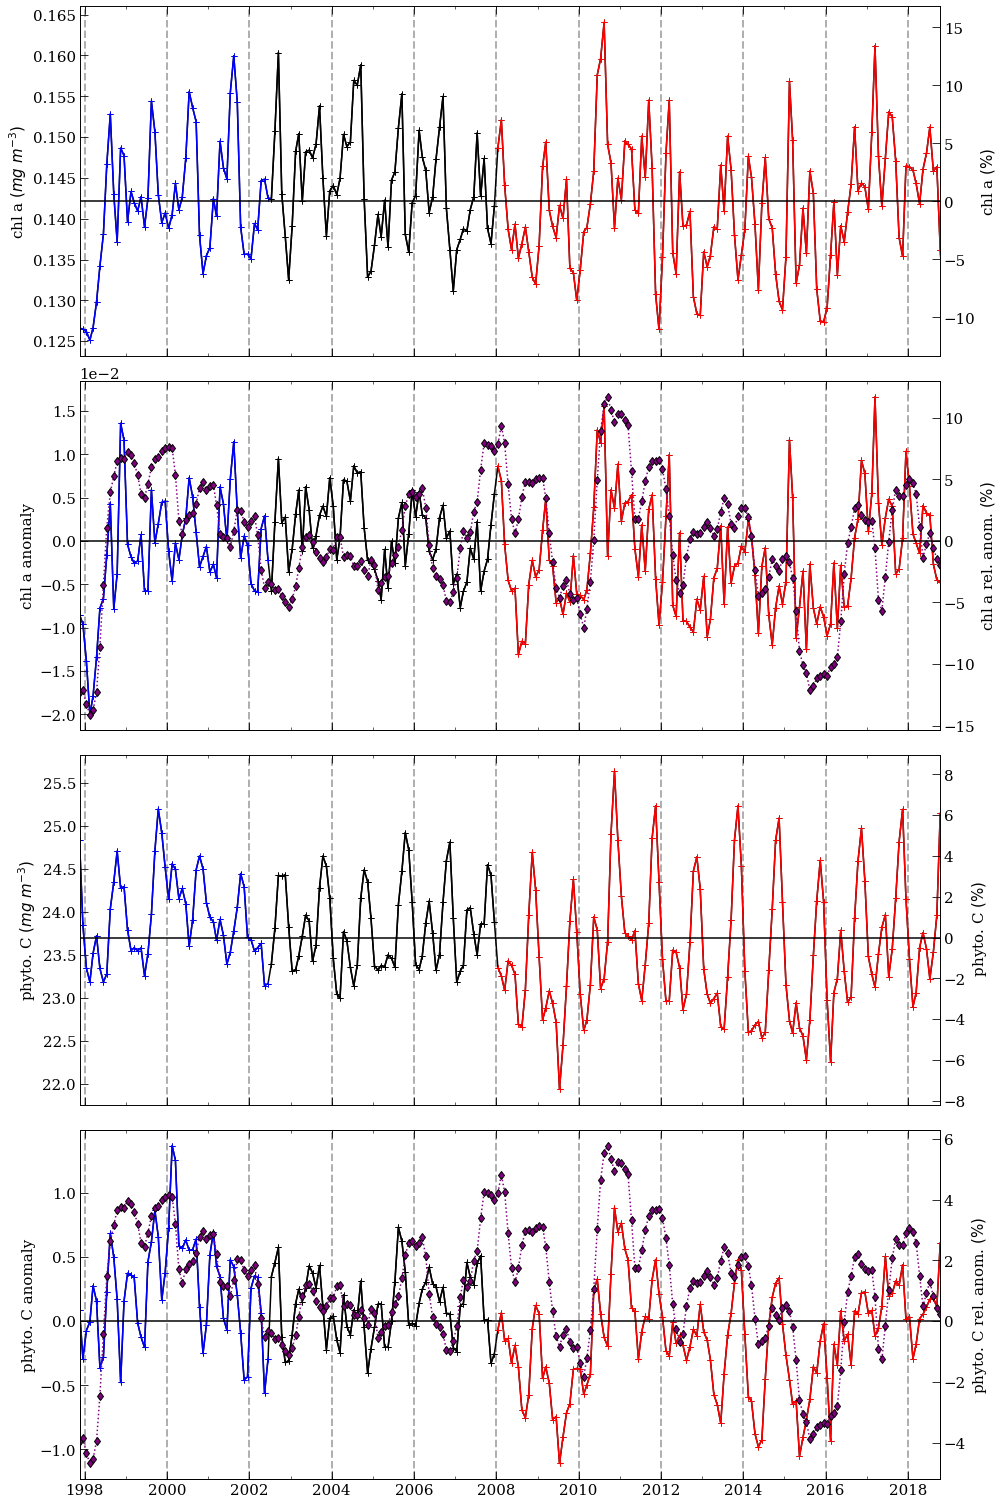

In [38]:
f, axs = pl.subplots(nrows=4, figsize=(14, 21), sharex=True)
make_ax_1(axs[0], df_all, lbl='chl_adj_mean',
          ylabel=r'chl a $(mg\ m^{-3})$', ylabel2=r'chl a $(\%)$')
make_ax_2(axs[1], df_both, lbl='chl_anomaly', mean_val=df_all.chl_adj_mean.mean(),
          ylabel='chl a anomaly $(mg\ m^{-3})$', ylabel2='chl a rel. anom. $(\%)$')
axs1_twin = axs[1].twinx()
axs1_twin.axes.get_yaxis().set_visible(False)
axs1_twin.axes.get_yaxis().set_ticks([])
df_all_.plot(y='chl_anom_scaled', ax=axs1_twin, linestyle=':', marker='d', color='purple',
           markeredgecolor='k', legend=False)
make_ax_1(axs[2], df_all, lbl='phyto_C_mean', #use95ci='_95CI_', use50ci='_50CI_', 
         ylabel=r'phyto. C $(mg\ m^{-3})$', ylabel2=r' phyto. C $(\%)$')
make_ax_2(axs[3], df_all, lbl='phyto_C_anomaly', mean_val=df_both.phyto_C_mean.mean(),
         ylabel='phyto. C anomaly $(mg\ m^{-3})$', ylabel2=r'phyto. C rel. anom. $(\%)$')
axs3_twin = axs[3].twinx()
axs3_twin.yaxis.set_visible(False)
axs3_twin.set_yticks([])
df_all_.plot(y='C_anom_scaled', ax=axs3_twin, linestyle=':', marker='d', color='purple',
           markeredgecolor='k', legend=False)
f.tight_layout()
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
#f.savefig('../FigJar/timeseries_%s.pdf' % dt_now, dpi=300, format='pdf')

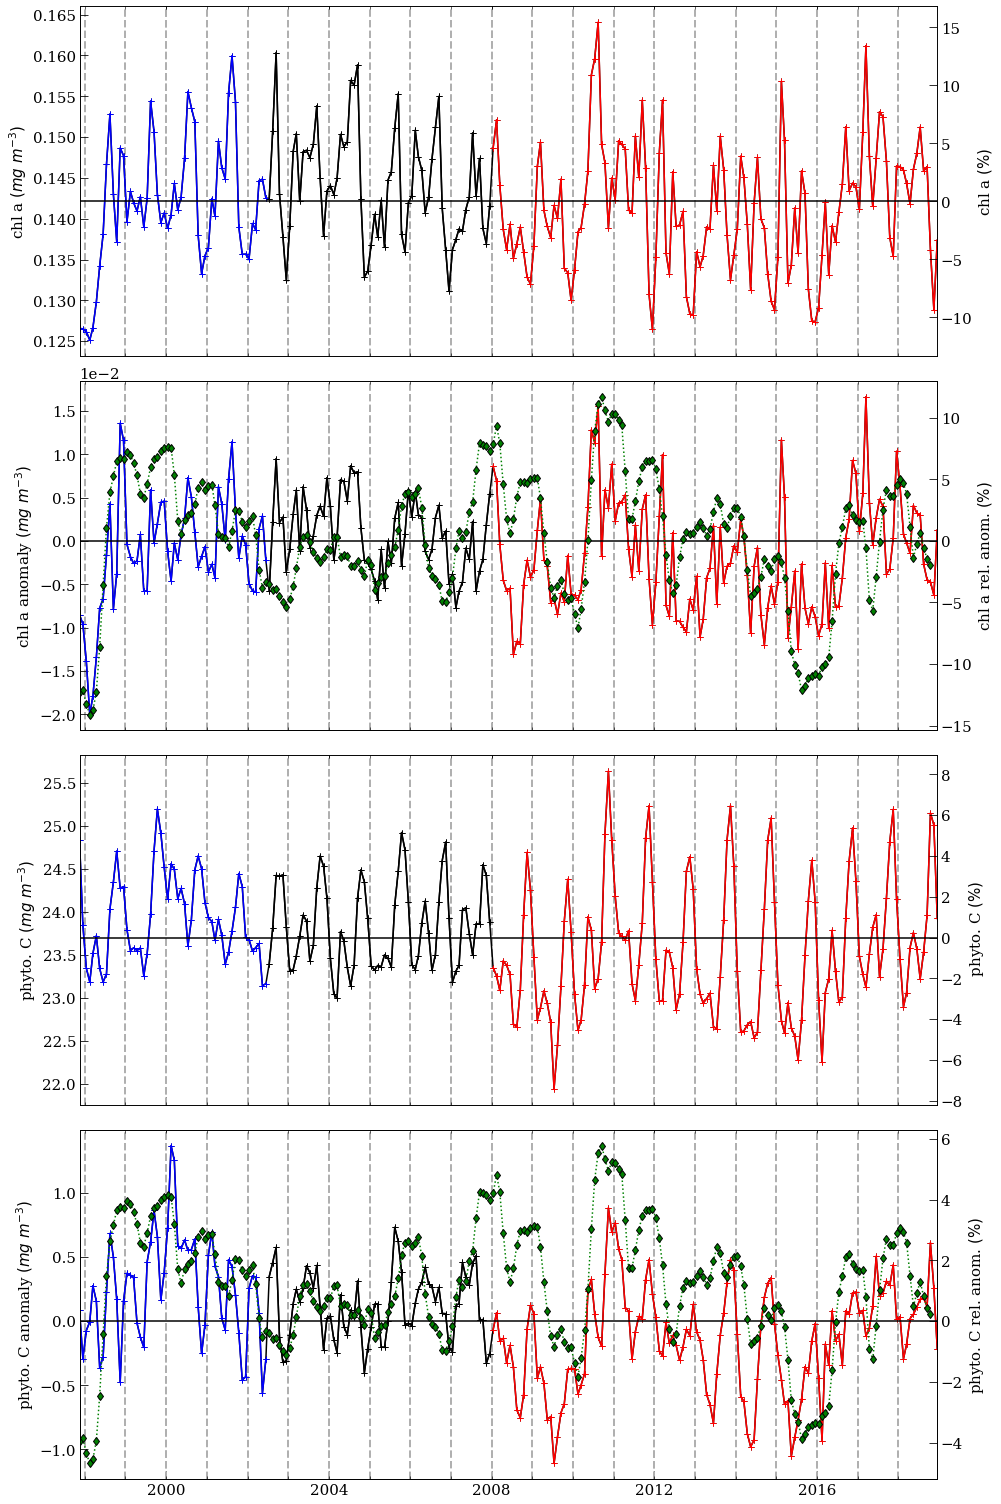

In [73]:
f, axs = pl.subplots(nrows=4, figsize=(14, 21), sharex=True)
make_ax_1(axs[0], df_all_2, lbl='chl_adj_mean',
          ylabel=r'chl a $(mg\ m^{-3})$', ylabel2=r'chl a $(\%)$')
make_ax_2(axs[1], df_both, lbl='chl_anomaly', mean_val=df_all.chl_adj_mean.mean(),
          ylabel='chl a anomaly $(mg\ m^{-3})$', ylabel2='chl a rel. anom. $(\%)$')
axs1_twin = axs[1].twinx()
axs1_twin.axes.get_yaxis().set_visible(False)
axs1_twin.axes.get_yaxis().set_ticks([])
df_all_2.plot(y='chl_anom_scaled', ax=axs1_twin, linestyle=':', marker='d', color='green',
           markeredgecolor='k', legend=False)
make_ax_1(axs[2], df_all_2, lbl='phyto_C_mean', #use95ci='_95CI_', use50ci='_50CI_', 
         ylabel=r'phyto. C $(mg\ m^{-3})$', ylabel2=r' phyto. C $(\%)$')
make_ax_2(axs[3], df_all_2, lbl='phyto_C_anomaly', mean_val=df_both.phyto_C_mean.mean(),
         ylabel='phyto. C anomaly $(mg\ m^{-3})$', ylabel2=r'phyto. C rel. anom. $(\%)$')
axs3_twin = axs[3].twinx()
axs3_twin.yaxis.set_visible(False)
axs3_twin.set_yticks([])
df_all_2.plot(y='C_anom_scaled', ax=axs3_twin, linestyle=':', marker='d', color='green',
           markeredgecolor='k', legend=False)
f.tight_layout()
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
f.savefig('../FigJar/timeseries_%s.pdf' % dt_now, dpi=300, format='pdf')

In [43]:
df_all.insert(0, 'Month', df_all.index.month_name())

In [44]:
df_all.head()

,Month,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI,inv_scaled,inv_scaled2,MEI_s
datetime,,,,,,,,,,,,,,,
1997-11-15,November,0.126552,0.002073,22.757247,24.142836,24.841083,25.530049,26.981910,-0.008520,0.087324,swf,2.4300,-0.017250,-0.71500,2.451941
1997-12-15,December,0.126516,0.001988,21.980533,23.123099,23.845324,24.430774,25.972896,-0.009597,-0.293074,swf,2.3995,-0.016996,-0.69975,2.418848
1998-01-15,January,0.126163,0.001946,21.502099,22.655481,23.347797,23.930489,25.382582,-0.013876,-0.073082,swf,2.6160,-0.018800,-0.80800,2.653759
1998-02-15,February,0.125127,0.001933,21.347144,22.505127,23.187600,23.768797,25.193990,-0.020037,-0.004399,swf,2.7640,-0.020033,-0.88200,2.814345
1998-03-15,March,0.126646,0.001961,21.685105,22.817465,23.517991,24.100255,25.604928,-0.017906,0.276416,swf,2.7045,-0.019537,-0.85225,2.749785


In [45]:
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December']

In [46]:
df_all.tail()

,Month,chl_adj_mean,bbp_adj_mean,phyto_C_95CI_lo,phyto_C_50CI_lo,phyto_C_mean,phyto_C_50CI_hi,phyto_C_95CI_hi,chl_anomaly,phyto_C_anomaly,sensor,MEI,inv_scaled,inv_scaled2,MEI_s
datetime,,,,,,,,,,,,,,,
2018-08-15,August,0.145831,0.001962,21.699946,22.833810,23.534577,24.118367,25.624667,-0.002679,0.182068,aqua,0.3205,0.000329,0.33975,0.163045
2018-09-15,September,0.146374,0.001998,22.065556,23.228285,23.961768,24.545511,26.085756,-0.004483,0.112339,aqua,0.4885,-0.001071,0.25575,0.345332
2018-10-15,October,0.136225,0.002099,23.030007,24.314325,25.148188,25.727042,27.321778,-0.004725,0.611075,aqua,0.5830,-0.001858,0.20850,0.447868
2018-11-15,November,0.128821,0.002088,22.907693,24.189000,25.009986,25.589265,27.168832,-0.006252,0.256226,aqua,NaN,NaN,NaN,NaN
2018-12-15,December,0.137366,0.001995,22.029605,23.196129,23.924953,24.510049,26.039054,0.001253,-0.213445,aqua,NaN,NaN,NaN,NaN


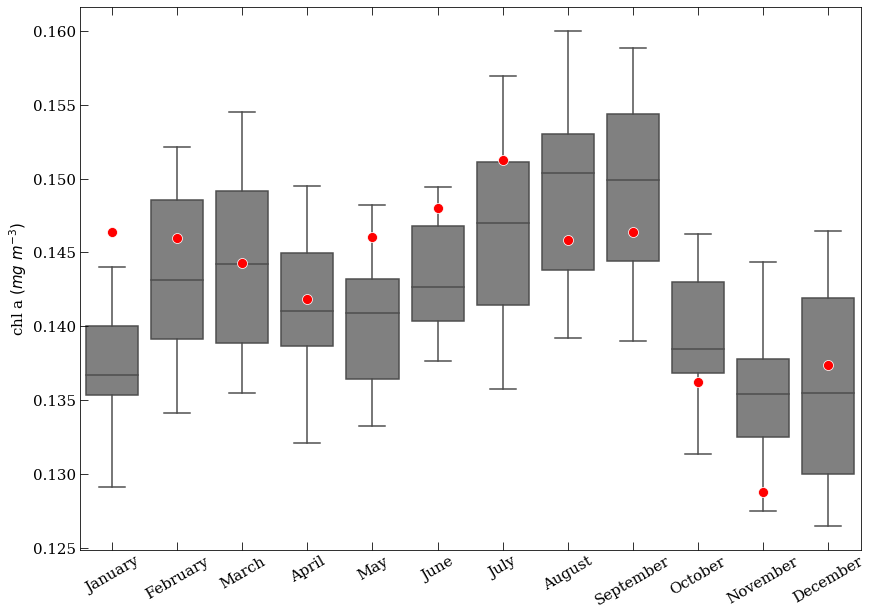

In [50]:
f, ax = pl.subplots(figsize=(14, 10))
ax = boxplot(x='Month', y='chl_adj_mean', data=df_all.loc[:'2017-12-15'], ax=ax, color='gray',
       showfliers=False, whis=[5, 95], order=ordered_months
            )

scatterplot(x='Month', y='chl_adj_mean', data=df_all.loc['2018-01-15':], ax=ax, color='r', s=100,
           zorder=3)
ax.tick_params(axis='x', rotation=30)
ax.set_xlabel('')
ax.set_ylabel('chl a $(mg\ m^{-3})$')
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
f.savefig('../FigJar/boxplot_chl%s.pdf' %dt_now, dpi=300, format='pdf')

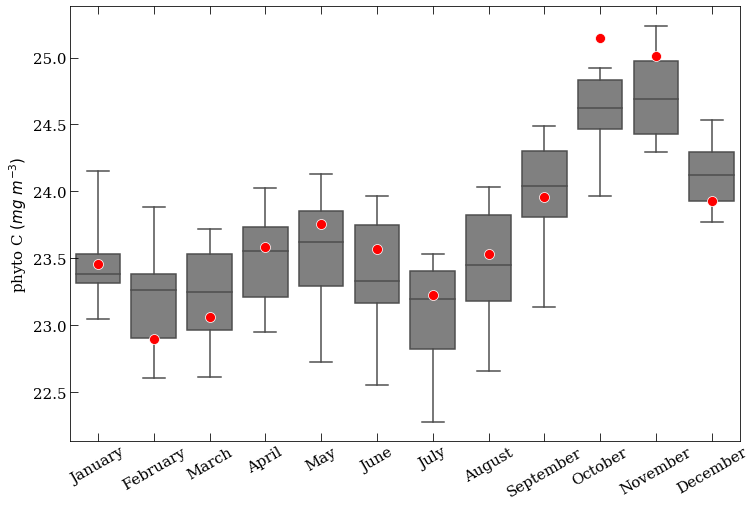

In [56]:
f, ax = pl.subplots(figsize=(12, 8))
ax = boxplot(x='Month', y='phyto_C_mean', data=df_all.loc[:'2017-12-15'], ax=ax, color='gray',
       showfliers=False, whis=[5, 95], order=['January', 'February', 'March',
                                              'April', 'May', 'June', 'July',
                                              'August', 'September', 'October',
                                              'November', 'December'])#showmeans=True)

scatterplot(x='Month', y='phyto_C_mean', data=df_all.loc['2018-01-15':], ax=ax, color='r',
           s=100, zorder=3)
ax.tick_params(axis='x', rotation=30)
ax.set_xlabel('')
ax.set_ylabel('phyto C $(mg\ m^{-3})$')
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
f.savefig('../FigJar/boxplot_C%s.pdf' % dt_now, dpi=300, format='pdf')

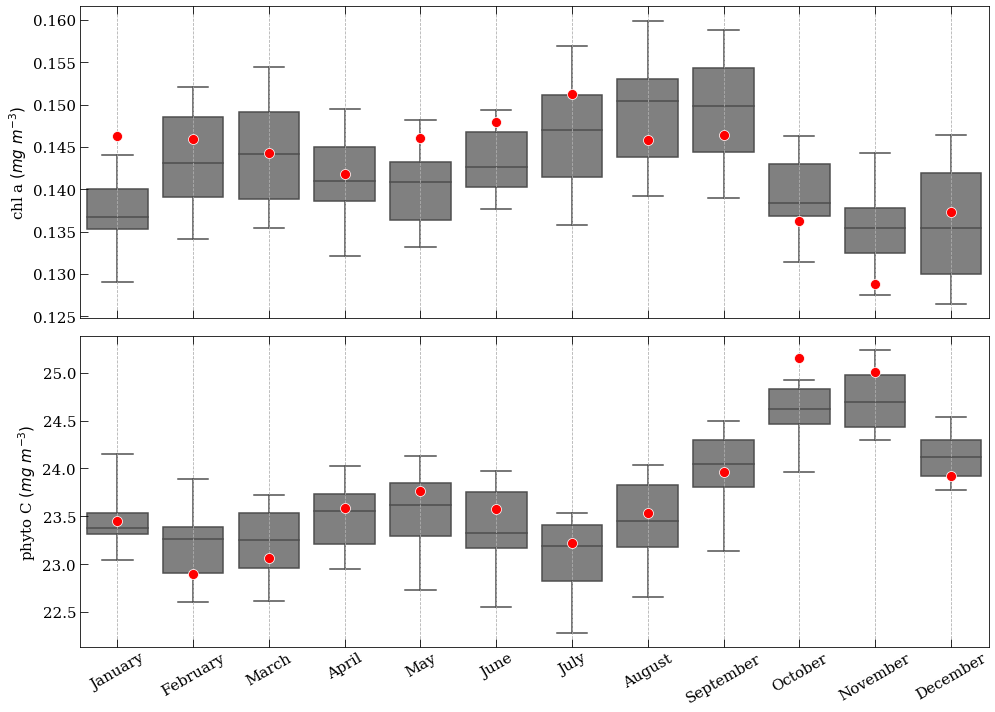

In [61]:
f, ax = pl.subplots(nrows=2, figsize=(14, 10), sharex=True)
boxplot(x='Month', y='chl_adj_mean', data=df_all.loc[:'2017-12-15'],
        ax=ax[0], color='gray',
        showfliers=False, whis=[5, 95], order=ordered_months, zorder=1);
scatterplot(x='Month', y='chl_adj_mean', data=df_all.loc['2018-01-15':],
            ax=ax[0], color='r', s=100,
           zorder=2);
ax[0].tick_params(axis='x', rotation=30)
ax[0].set_xlabel('')
ax[0].set_ylabel('chl a $(mg\ m^{-3})$')
ax[0].grid(axis='x', zorder=0, ls='--')
boxplot(x='Month', y='phyto_C_mean', data=df_all.loc[:'2017-12-15'],
        ax=ax[1], color='gray', showfliers=False, whis=[5, 95],
        order=['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November',
               'December'], zorder=1)
scatterplot(x='Month', y='phyto_C_mean', data=df_all.loc['2018-01-15':],
            ax=ax[1], color='r', s=100, zorder=2,)
ax[1].tick_params(axis='x', rotation=30)
ax[1].set_xlabel('')
ax[1].set_ylabel('phyto C $(mg\ m^{-3})$')
ax[1].grid(axis='x', zorder=0, ls='--')
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
f.tight_layout()
f.savefig('../FigJar/boxplot_chl&C_%s.pdf' %dt_now, dpi=300, format='pdf')

In [53]:
a = ax[0]

In [ ]:
a.grid()

In [65]:
group = df_all.loc[:'2017-12-15', ['Month', 'chl_adj_mean', 'phyto_C_mean']].groupby(['Month'])

In [66]:
dfboxplot = group.describe(percentiles=[0.05, 0.25, 0.5,
                            0.75, 0.95]).loc[ordered_months].drop(columns=['count', 'mean',
                                                                          'std', 'min', 'max'],
                                                                  level=1).round(decimals=3)

In [67]:
dfboxplot

chl_adj_mean                             phyto_C_mean          \
                    5%    25%    50%    75%    95%           5%     25%   
Month                                                                     
January          0.129  0.135  0.137  0.140  0.144       20.439  20.727   
February         0.134  0.139  0.143  0.149  0.152       20.006  20.311   
March            0.135  0.139  0.144  0.149  0.155       20.030  20.357   
April            0.132  0.139  0.141  0.145  0.150       20.341  20.608   
May              0.133  0.136  0.141  0.143  0.148       20.162  20.708   
June             0.138  0.140  0.143  0.147  0.150       19.972  20.574   
July             0.136  0.141  0.147  0.151  0.157       19.661  20.189   
August           0.139  0.144  0.150  0.153  0.160       20.038  20.525   
September        0.139  0.144  0.150  0.154  0.159       20.524  21.147   
October          0.131  0.137  0.138  0.143  0.146       21.337  21.794   
November         0.127  0.133  0.135  0.138  0.144       21.660  21.791   
December         0.127  0.130  0.135  0.142  0.146       21.155  21.312   

                                   
              50%     75%     95%  
Month                              
January    20.803  20.926  21.503  
February   20.658  20.805  21.320  
March      20.651  20.941  21.117  
April      20.954  21.129  21.391  
May        21.015  21.209  21.488  
June       20.699  21.091  21.331  
July       20.557  20.775  20.898  
August     20.808  21.154  21.388  
September  21.397  21.642  21.819  
October    21.955  22.161  22.253  
November   22.042  22.324  22.569  
December   21.520  21.668  21.894

In [68]:
dfboxplot.to_html('boxplot.html')

In [69]:
df_all.loc['2018-01-15':, ['chl_adj_mean', 'phyto_C_mean']].to_html('currentyeardata.html')